In [1]:
import os
import numpy as np
import cv2
import pandas as pd
import gc
import random
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers

import keras
from sklearn.preprocessing import LabelBinarizer

In [2]:
directory = 'PlantVillage'
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(256,
    256), shuffle=True, seed=1337, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False)

Found 20638 files belonging to 15 classes.
Using 16511 files for training.


In [3]:
valset = tf.keras.preprocessing.image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(256,
    256), shuffle=True, seed=1337, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False)

Found 20638 files belonging to 15 classes.
Using 4127 files for validation.


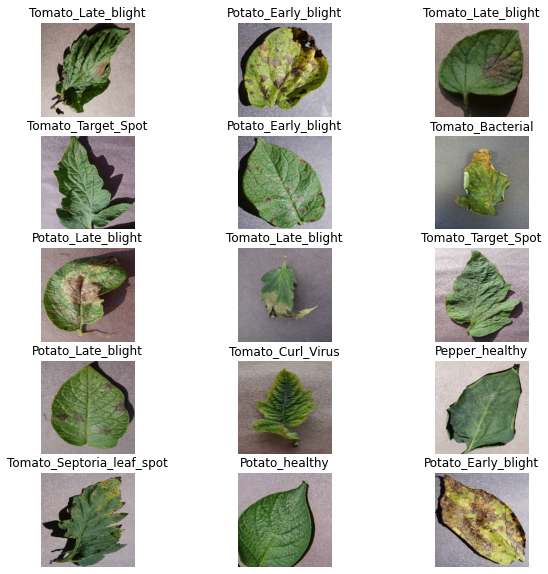

In [4]:
class_names = dataset.class_names
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
#dataset = dataset.prefetch(buffer_size=32)
#valset = valset.prefetch(buffer_size=32)

In [11]:
image_size = (256, 256)
batch_size = 32

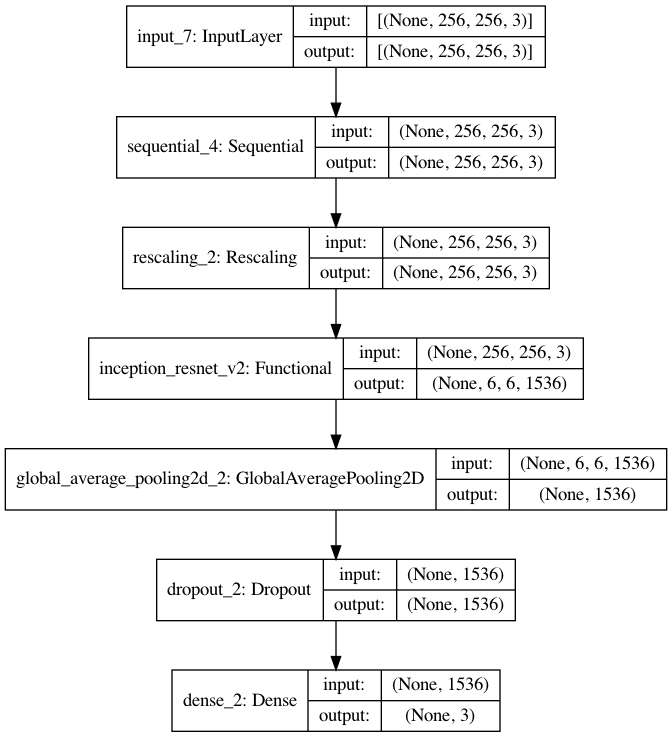

In [14]:
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal'),layers.experimental.preprocessing.RandomRotation(0.1),])

train_ds = dataset.prefetch(buffer_size=32)
validation_ds = valset.prefetch(buffer_size=32)
model = tf.keras.applications.InceptionResNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
  # Image augmentation block
    x = data_augmentation(inputs)

  # Entry block
    x = layers.experimental.preprocessing.Rescaling(1./255)(x)
    x = model(x)

    previous_block_activation = x  # Set aside residual

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = 'sigmoid'
        units = 1
    else:
        activation = 'softmax'
        units = num_classes
  
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

model = make_model(input_shape=image_size + (3,), num_classes=3)
keras.utils.plot_model(model, show_shapes=True)

In [15]:
epochs = 10
#model = make_model(input_shape=image_size + (3,), num_classes=3)
#file_path = "/content/drive/My Drive/TrainedNetwork/."

checkpoint = tf.keras.callbacks.ModelCheckpoint("/content/drive/My Drive/TrainedNetwork/model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5", verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_ds, epochs=epochs, validation_data=validation_ds, callbacks=[checkpoint], verbose=2)

Epoch 1/10


ValueError: in user code:

    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [18]:
train_dataset = tf.data.Dataset.from_tensor_slices(dataset[0:1]).shuffle(TRAIN_BUF).batch(BATCH_SIZE, drop_remainder=True)
#test_dataset = tf.data.Dataset.from_tensor_slices(valset).shuffle(TRAIN_BUF).batch(BATCH_SIZE)

#print(train_dataset, type(train_dataset), test_dataset, type(test_dataset))

TypeError: 'BatchDataset' object is not subscriptable

In [6]:
type(d)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [7]:
aug = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [8]:
from keras.applications import ResNet50
import keras.models

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet.layers[:-4]:
    layer.trainable = False

def nvidia_model():
    model = keras.models.Sequential()
    model.add(resnet)

    #comment out
   # model.add(MaxPooling2D(pool_size=(2, 2)))
   # model.add(Dropout(0.5))
    
    model.add(keras.layers.Flatten())
    
  
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
  
      
    
    model.add(keras.layers.Dense(15,activation='softmax'))
  


    optimizer = keras.optimizers.Adam(lr=1e-3)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               51380736  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                7695      
Total params: 74,976,143
Trainable params: 52,443,151
Non-trainable params: 22,532,992
_________________________________________________________________
None


In [11]:
checkpoint = keras.callbacks.ModelCheckpoint('model.h5', monitor='val_loss',verbose=1,save_best_only=True, mode='auto')
BS=42
history = model.fit_generator(
    dataset,
    validation_data=valset,
    steps_per_epoch=len(dataset) // BS,
    epochs=30, verbose=1,
    callbacks=[checkpoint]
    )

Epoch 1/30


/Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: in user code:

    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/michaellaraglione/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential: expected shape=(None, 224, 224, 3), found shape=(None, 256, 256, 3)


In [ ]:
labelBinar = LabelBinarizer()
image_labels = labelBinar.fit_transform(class_names)

In [ ]:
import os
img_size = 224
def get_data(data_dir, labels):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, image_labels, test_size=0.2, random_state = 42) 